In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^RUI', start = '2014-03-11',end = '2024-07-10')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-11,1050.920044,1053.300049,1042.550049,1044.680054,1044.680054,0
2014-03-12,1042.479980,1045.280029,1037.119995,1045.270020,1045.270020,0
2014-03-13,1046.630005,1048.660034,1030.319946,1032.939941,1032.939941,0
2014-03-14,1031.880005,1036.599976,1029.910034,1030.800049,1030.800049,0
2014-03-17,1033.989990,1042.510010,1033.989990,1040.219971,1040.219971,0
2014-03-18,1041.079956,1048.839966,1041.079956,1048.030029,1048.030029,0
2014-03-19,1047.680054,1049.060059,1035.750000,1041.530029,1041.530029,0
2014-03-20,1040.459961,1048.069946,1037.739990,1047.219971,1047.219971,0
2014-03-21,1048.810059,1053.530029,1042.439941,1044.069946,1044.069946,0


In [14]:
import pandas as pd

# Assuming df is your DataFrame
# Specify the path where you want to save the CSV file
file_path = 'C:/Users/aliho/Documents/output.csv'  # Update this path

# Export the DataFrame to a CSV file
data.to_csv(file_path, index=False)


In [3]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

C:\Users\aliho\AppData\Local\Temp\ipykernel_19372\2358861191.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [4]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,1070.109985,1075.160034,1057.040039,1057.089966,34.466106,1091.443283,1086.583582,1076.719736,-17.380005,0,1039.380005
1,1056.760010,1060.709961,1039.030029,1039.380005,30.085467,1086.484875,1085.648858,1076.225170,-0.939941,0,1041.790039
2,1042.729980,1053.500000,1038.410034,1041.790039,31.357525,1082.228224,1084.780366,1075.769075,-1.790039,0,1034.479980
3,1036.270020,1038.359985,1010.799988,1034.479980,29.606899,1077.680773,1083.784319,1075.222200,8.209961,1,1035.989990
4,1027.780029,1043.010010,1019.520020,1035.989990,30.466052,1073.710222,1082.837897,1074.702568,8.790039,1,1049.040039
5,1040.250000,1055.520020,1040.250000,1049.040039,37.526495,1071.360681,1082.168632,1074.362667,10.339966,1,1058.819946
6,1048.479980,1059.290039,1046.829956,1058.819946,42.236029,1070.166325,1081.706282,1074.156803,17.209961,1,1080.250000
7,1063.040039,1080.910034,1063.040039,1080.250000,50.922039,1071.126675,1081.677445,1074.237507,-9.339966,0,1071.780029
8,1081.119995,1084.660034,1071.670044,1071.780029,47.873575,1071.188899,1081.481456,1074.204958,8.849976,1,1085.130005
9,1076.280029,1091.369995,1076.280029,1085.130005,52.659540,1072.516624,1081.553705,1074.349661,6.500000,1,1092.589966


In [5]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.03128394 0.02918289 0.03029171 ... 0.55989233 0.         0.01653394]
 [0.02469032 0.02202946 0.02141948 ... 0.61881729 0.         0.01772377]
 [0.01776081 0.0184602  0.02111405 ... 0.61577035 0.         0.01411481]
 ...
 [0.98899083 0.98917344 0.98663013 ... 0.67372793 1.         0.99824253]
 [0.99112454 0.99663863 0.99232482 ... 0.62017888 0.         0.99973833]
 [1.         1.         1.         ... 0.60612898 0.         1.        ]]


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2449
[[[3.12839402e-02 2.91828860e-02 3.02917103e-02 ... 2.49756084e-02
   2.89039216e-03 1.50184189e-03]
  [2.46903174e-02 2.20294551e-02 2.14194783e-02 ... 2.24085085e-02
   2.36086390e-03 1.21203330e-03]
  [1.77608126e-02 1.84602028e-02 2.11140515e-02 ... 2.02047267e-02
   1.86885704e-03 9.44768477e-04]
  ...
  [6.30124071e-02 6.24993523e-02 6.83274855e-02 ... 3.89733378e-02
   7.08264663e-03 6.09673411e-03]
  [6.53485692e-02 6.13310542e-02 6.79235572e-02 ... 3.99392558e-02
   7.57720413e-03 6.51203814e-03]
  [6.35260878e-02 6.19300993e-02 6.79530836e-02 ... 4.09438471e-02
   8.09169629e-03 6.94240936e-03]]

 [[2.46903174e-02 2.20294551e-02 2.14194783e-02 ... 2.24085085e-02
   2.36086390e-03 1.21203330e-03]
  [1.77608126e-02 1.84602028e-02 2.11140515e-02 ... 2.02047267e-02
   1.86885704e-03 9.44768477e-04]
  [1.45702042e-02 1.09652201e-02 7.51257435e-03 ... 1.78503895e-02
   1.30458887e-03 6.24307296e-04]
  ...
  [6.53485692e-02 6.13310542e-02 6.79235572e-02 ... 3.99392558e-02
   7.

In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1935
(1935, 30, 8)
(484, 30, 8)
(1935, 1)
(484, 1)
[[0.07128012]
 [0.07073706]
 [0.07222798]
 ...
 [0.61999081]
 [0.61350368]
 [0.63145941]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
117/117 [==============================] - 3s 15ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 2/30
117/117 [==============================] - 1s 13ms/step - loss: 2.7308e-04 - val_loss: 0.0033
Epoch 3/30
117/117 [==============================] - 2s 13ms/step - loss: 2.6367e-04 - val_loss: 0.0011
Epoch 4/30
117/117 [==============================] - 1s 12ms/step - loss: 2.2321e-04 - val_loss: 9.5215e-04
Epoch 5/30
117/117 [==============================] - 2s 13ms/step - loss: 2.0531e-04 - val_loss: 0.0011
Epoch 6/30
117/117 [==============================] - 2s 14ms/step - loss: 2.0274e-04 - val_loss: 0.0010
Epoch 7/30
117/117 [==============================] - 2s 13ms/step - loss: 1.9632e-04 - val_loss: 7.4341e-04
Epoch 8/30
117/117 [==============================] - 2s 13ms/step - loss: 2.1234e-04 - val_loss: 0.0012
Epoch 9/30
117/117 [==============================] - 2s 14ms/step - loss: 2.4559e-04 - val_loss: 0.0020
Epoch 10/30
117/117 [==============================

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 0s 7ms/step
[0.61245495] [0.6306152]
[0.6250847] [0.62985489]
[0.62832266] [0.62951921]
[0.6260579] [0.62333316]
[0.62798125] [0.64882285]
[0.6223016] [0.64773167]
[0.6393254] [0.66747959]
[0.6440406] [0.67183898]
[0.6555697] [0.67397179]
[0.66141313] [0.66413243]


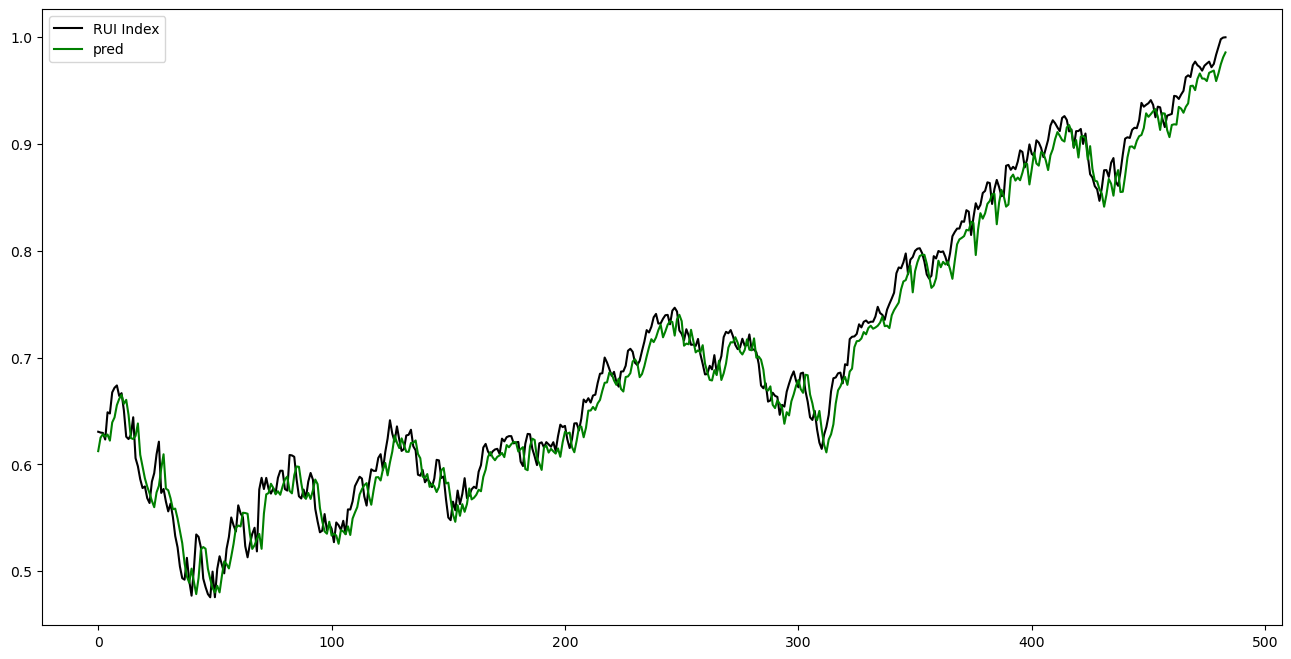

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'RUI Index')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()